<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Classification of 'CryptoCurrency' and 'Stocks' Subreddits

# Exploratory Data Analysis

### Contents
1. [Post Length Distribution](#1.-Post-Length-Distribution)
2. [Frequency of Key Words](#2.-Frequency-of-Key-Words)
3. [Context for Frequent Words](#3.-Context-for-Frequent-Words)
4. [Sentiment Analysis](#4.-Sentiment-Analysis)

In [377]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pickle

from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

In [378]:
# import dataframe
df = pd.read_pickle('../datasets/final')

In [379]:
df.head()

,subreddit,upvote_ratio,text,text_adj,token
0,CryptoCurrency,1.0,Media is bullish again,media is bullish again,"[medium, bullish]"
1,CryptoCurrency,1.0,Half of All Bitcoin Open Interest on CME Set to Expire Friday,half of all bitcoin open interest on cme set to expire friday,"[half, bitcoin, open, interest, cme, set, expire, friday]"
2,CryptoCurrency,1.0,BBC release Doctor Who trading cards using NFTs on blockchain,bbc release doctor who trading cards using nfts on blockchain,"[bbc, release, doctor, trading, card, using, nfts, blockchain]"
3,CryptoCurrency,1.0,What's going on with bitcoin prehalving????,what is going on with bitcoin prehalving????,"[going, bitcoin, prehalving]"
4,CryptoCurrency,1.0,Quantum Financial Reset To A 3D/5D Hybrid State Ahead,quantum financial reset to a 3d/5d hybrid state ahead,"[quantum, financial, reset, 3, 5, hybrid, state, ahead]"


In [380]:
# check shape
df.shape

(5000, 5)

## 1. Post Length Distribution

In [381]:
# create length and word count features
df['text_length'] = df['text'].map(len)
df['word_count'] = df['text'].map(lambda x: len(x.split()))

### 1.1 Longest and Shortest posts

In [382]:
# 5 shortest posts in crypto
df[df['subreddit']=='CryptoCurrency'].sort_values(by='word_count')[['text']].head()

,text
1322,Stonks
102,Bitcoin
1314,XRP
731,Happiness
1320,Ha!


In [383]:
# 5 longest posts in crypto

with pd.option_context('display.max_colwidth', 400):
  display(df[df['subreddit']=='CryptoCurrency'].sort_values(by='word_count', ascending=False)[['text']].head())

,text
1180,Why Dogecoin Isn’t Going Away (Even When It Dumps) And This Community Needs To Accept ThatThis is a revised version of my previous article. \n\nMaybe this community won’t down vote me to crap now that everything I’m about to tell you have been proven correct based on empirical evidence. \n\nMaybe you guys will actually read my entire post instead of saying it’s “too long” - \n\nif after you re...
1738,"As awareness is increasing for Quant after recent announcements, here is an overview and links to find more info about this fantastic project 1/ As awareness is increasing for [@quant\_network](https://twitter.com/quant_network) after recent announcements I encourage everyone to see the thread below providing more details around the project. Excellent Team, Tech, Use cases, Tokenomics, Partner..."
1323,How I plan to identify and sell the top of the next market cycle.In this post I will share with you some of the strategies I will use to identify the next market cycle top so I can sell for maximum profits (and of course buy back in later in the subsequent bear market!) In the first part of this post I will discuss the resources I will use and in the second part I will discuss tactics in selli...
2397,"Crypto Rocket Fuel: Corrections, Crashes, and Capitulations \n\nDisclaimer: This is not financial advice. I am not a financial advisor and do not proclaim to have such insight. I have a background in data science and machine learning. Crypto is risky…risky business. Invest only what you can afford to lose and DO NOT LEVERAGE yourself. Please.\n\nFirst, I want to say that I’m sorry. I’m sorry ..."
2240,"TON Explained: What Was TON And Is It Really Over?One of the most striking phenomena of the crypto industry is the struggle of the SEC with the GRAM cryptocurrency and the TON blockchain network. There were tons of theories and forecasts built, and a great future was predicted for the project. But something went wrong, and the US authorities declared war on Durov's system.\n\nIn this review, w..."


In [384]:
# 5 shortest posts in stocks
df[df['subreddit']=='stocks'].sort_values(by='word_count', ascending=True)[['text']].head()

,text
3367,Newby tips
2804,Rookie question
3417,Portfolio Feedback
3007,Rigel Pharmaceuticals
2745,TSLA 🚀🚀🚀🚀🚀🚀🚀


In [385]:
# 5 longest posts in stocks

with pd.option_context('display.max_colwidth', 400):
  display(df[df['subreddit']=='stocks'].sort_values(by='word_count', ascending=False)[['text']].head())

,text
3229,"Wall Street Week Ahead for the trading week beginning May 3rd, 2021Goooooood Sunday morning to all of you here on r/stocks. I hope everyone on this sub made out pretty nicely in the market this past week, and is ready for the new trading week ahead.\n\nHere is everything you need to know to get you ready for the trading week beginning May 3rd, 2021.\n\n# **More earnings, April’s big jobs repor..."
3443,"Wall Street Week Ahead for the trading week beginning June 1st, 2020Good Saturday morning to all of you here on r/stocks. I hope everyone on this sub made out pretty nicely in the market this past week, and is ready for the new trading month ahead.\n\nHere is everything you need to know to get you ready for the trading week beginning June 1st, 2020.\n\n# **Expect more shocking economic data in..."
4499,Stryker DD \n\n**Stryker**\n\n \n\nISIN\n\n&amp;#x200B;\n\nUS8636671013\n\n \n\nWKN\n\n&amp;#x200B;\n\n864952\n\n \n\nHeadquarters\n\n&amp;#x200B;\n\nUSA\n\n \n\nPrice\n\n&amp;#x200B;\n\n210 USD\n\n \n\nOutstanding shares\n\n&amp;#x200B;\n\n380 Mio.\n\n \n\nMarket capitalization\n\n&amp;#x200B;\n\n79.800 Mio. USD\n\n \n\nNet indebtedness\n\n&amp;#x200B;\n\n6.200 Mio. USD\n\n \n\nenterpri...
3362,Lumber DD: Ignore the Misinformation/Clickbait. The actual price of lumber is still RISING and data shows future demand still very high.The amount bullshit or selective use of statistics by the clickbait headlines and the bears on social media is pissing me off so I’m doing another post to help those who follow me sift through the bullshit. When evaluating your investment decisions (whether y...
3508,"Due Diligence on Hyliion (HYLN)I’d like to preface this post by stating this is my first proper DD that I’ve publicly submitted. I’ve been a follower of r/stocks for nearly 4 years now, mostly lurking and absorbing information. This is my way of thanking this community for helping me begin my investment journey and helping me mature into financial adulthood. I also think it’s necessary for me ..."


- From a first glance, the longest posts are similar between cryptocurrency and stocks - either people are sharing news related to crypto/stocks, or people want other users to comment on their financial strategy for investing in crypto/stocks
- 2/5 of the shortest posts in crypto are links - it may be interesting to see if more posts in the cryptocurrency or the stocks subreddit actually share links

### 1.2 Distribution of Post Length

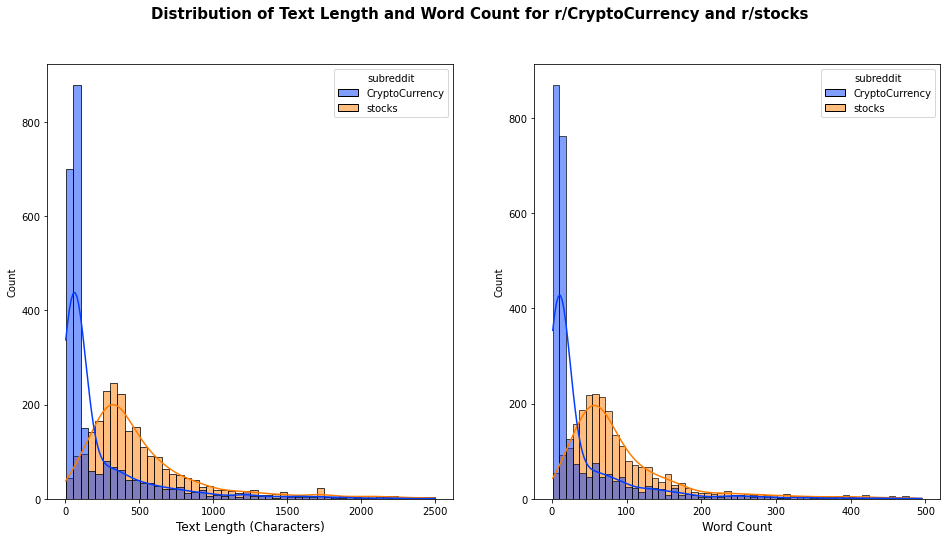

In [386]:
# Compare text length and word count

title_fig = plt.figure(figsize=(16,8))
sns.set_palette('bright')

# text legnth
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Text Length (Characters)', fontsize=12)
sns.histplot(data=df[df['text_length']<2500], x="text_length", hue="subreddit", kde = True)

# word count
ax2 = plt.subplot(1,2,2)
sns.histplot(data=df[df['word_count']<500], x="word_count", hue="subreddit", kde = True)
ax2.set_xlabel('Word Count', fontsize=12)

plt.suptitle('Distribution of Text Length and Word Count for r/CryptoCurrency and r/stocks', fontsize=15, fontweight = 'bold');



- The text length and word count distributions are very similar
- The text length and word count distributions for both cryptocurrency and stocks are skewed to the right, however, the skew is greater for cryptocurrency lengths
- Posts in the cryptocurrency subreddit tend to be shorter and use fewer words than posts in the stocks subreddit

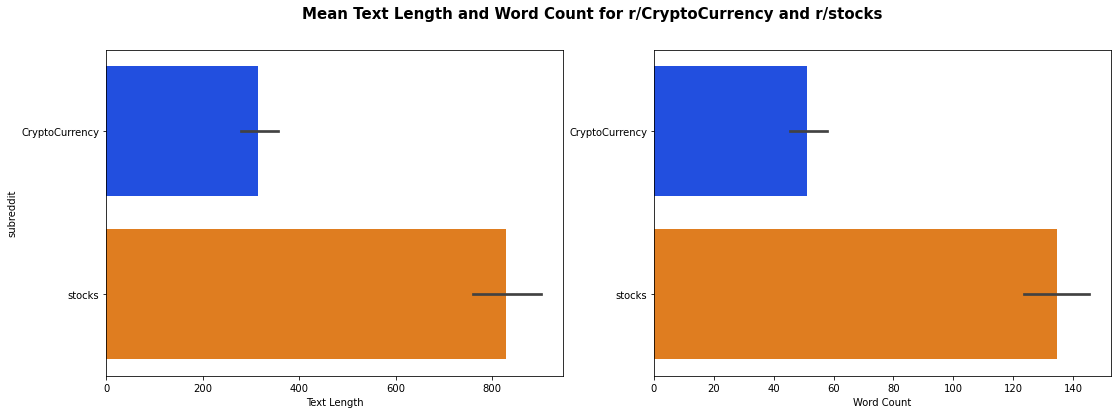

In [387]:
fig = plt.figure(figsize=(18,6))

# text length
ax1 = plt.subplot(1,2,1)
sns.barplot(data = df, x = 'text_length', y = 'subreddit')
ax1.set_ylabel('subreddit')
ax1.set_xlabel('Text Length')

# word count
ax2 = plt.subplot(1,2,2)
sns.barplot(data = df, x = 'word_count', y = 'subreddit')
ax2.set_ylabel('')
ax2.set_xlabel('Word Count')

plt.suptitle('Mean Text Length and Word Count for r/CryptoCurrency and r/stocks', fontsize=15, fontweight = 'bold');

- On average, posts in the stocks subreddit have nearly three times as many words as the cryptocurrency subreddit
- This is in line with what I saw during data cleaning, where more posts in the cryptocurrency subreddit had titles only with no text (and therefore would have a smaller word count) than the posts in the stocks subreddit

## 2. Frequency of Key Words

### 2.1 Unigrams

In [388]:
top_20_tokens = df['token'].explode().value_counts()[:20].index
top_20_crypto = []
top_20_stocks = []
for token in top_20_tokens:
    top_20_crypto.append(df[df['subreddit']=='CryptoCurrency']['token'].explode().value_counts()[token])
    top_20_stocks.append(df[df['subreddit']=='stocks']['token'].explode().value_counts()[token])
    
top20 = pd.DataFrame({'CryptoCurrency': top_20_crypto, 'Stocks': top_20_stocks}, index = top_20_tokens)

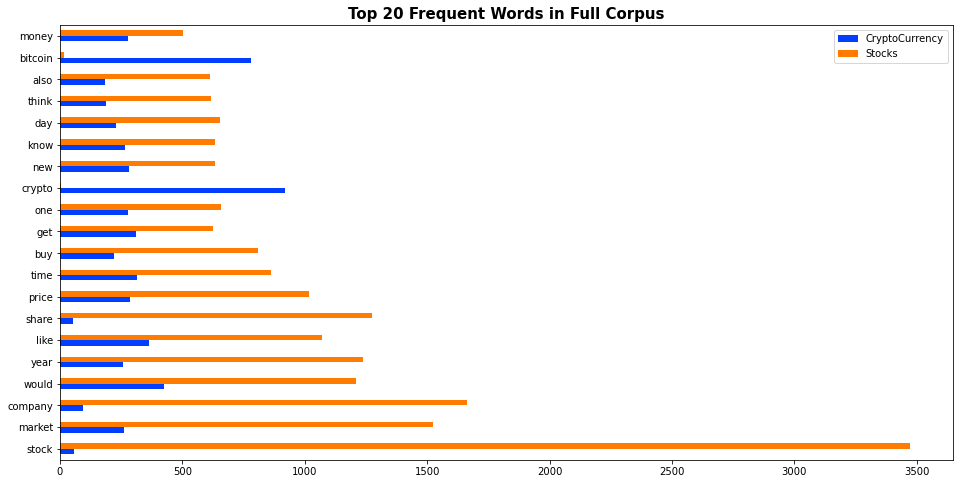

In [389]:
top20.plot(kind = 'barh', figsize=(16,8))
plt.title('Top 20 Frequent Words in Full Corpus', fontsize=15, fontweight = 'bold');

- From the 20 most common words (excluding stop words) across both subreddits, it seems most of the words in the list are from the r/stocks
- This makes sense because posts tend to be longer in the stocks subreddit, therefore there are simply more words from this subreddit
- The exception is "crypto" which, from the top 20 words in the corpus, has the highest frequency in r/CryptoCurrency, but rarely appears in r/stocks
- It is interesting the word "stock" appears more frequently in r/CryptoCurrency than "crypto" appears in r/stocks

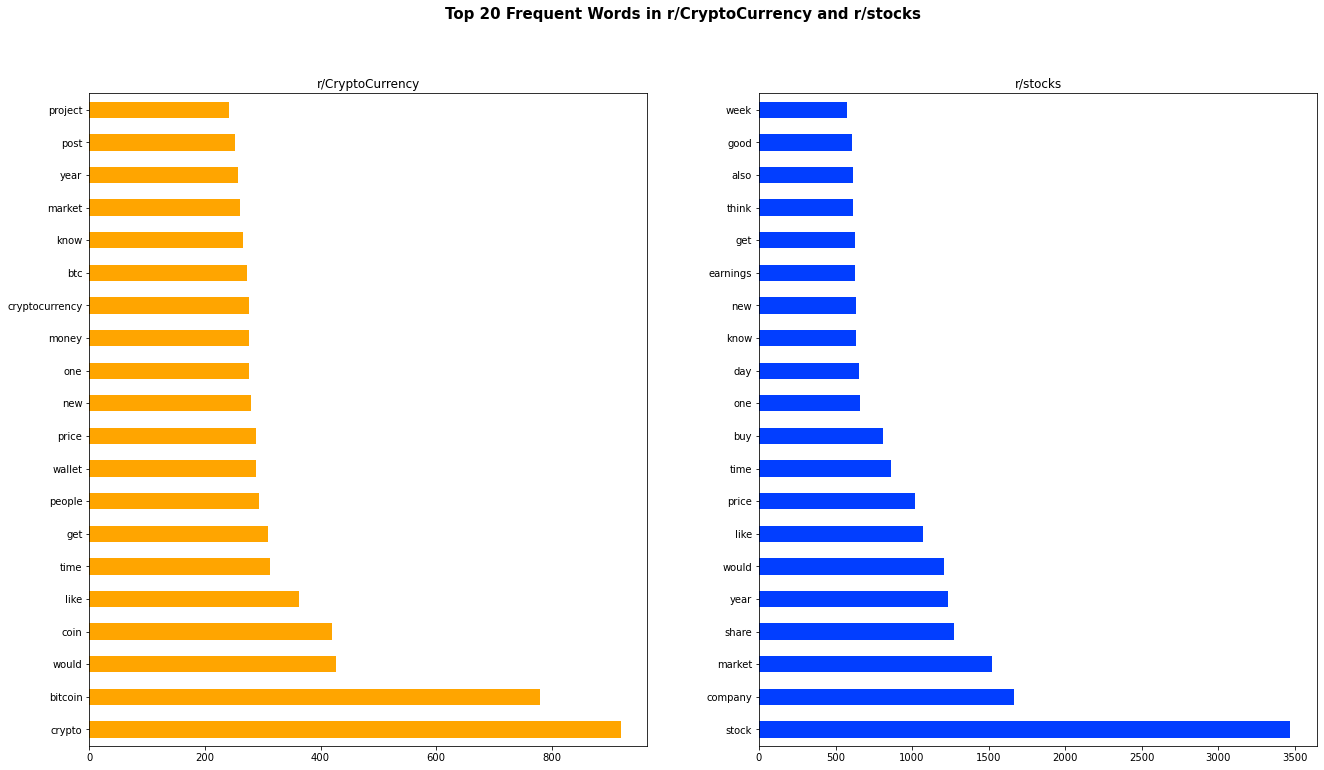

In [390]:
fig = plt.figure(figsize=(22,12))

ax1 = plt.subplot(1,2,1)
crypto_tokens = df[df['subreddit']=='CryptoCurrency']['token'].explode()
crypto_tokens.value_counts()[:20].plot(kind='barh', color = 'orange')
ax1.set_title('r/CryptoCurrency')


ax2 = plt.subplot(1,2,2)
stocks_tokens = df[df['subreddit']=='stocks']['token'].explode()
stocks_tokens.value_counts()[:20].plot(kind='barh')
ax2.set_title('r/stocks')

plt.suptitle('Top 20 Frequent Words in r/CryptoCurrency and r/stocks', fontsize=15, fontweight = 'bold');

In [391]:
# words unique in crypto
set(crypto_tokens.value_counts()[:20].index) - set(stocks_tokens.value_counts()[:20].index)

{'bitcoin',
 'btc',
 'coin',
 'crypto',
 'cryptocurrency',
 'money',
 'people',
 'post',
 'project',
 'wallet'}

In [392]:
# words unique in stocks
set(stocks_tokens.value_counts()[:20].index) - set(crypto_tokens.value_counts()[:20].index) 

{'also',
 'buy',
 'company',
 'day',
 'earnings',
 'good',
 'share',
 'stock',
 'think',
 'week'}

In [393]:
# words in both stocks and crypto
set(stocks_tokens.value_counts()[:20].index).intersection(set(crypto_tokens.value_counts()[:20].index))

{'get',
 'know',
 'like',
 'market',
 'new',
 'one',
 'price',
 'time',
 'would',
 'year'}

- As expected, 'crypto' is the most common word in r/CryptoCurrency and stocks is the most common word in r/stocks
- I would expect the following words will be important in determining if a post is similar to the content posted in r/CryptoCurrency:
>'bitcoin',
>'btc',
>'coin',
>'crypto',
>'cryptocurrency',
>'money',
>'people',
>'post',
>'project',
>'wallet'
- Although the following words are common in r/CryptoCurrency, they are also common in r/Stocks and therefore may not be very helpful when building my classification model. It is interesting to note there are some financial term overlaps such as "market" and "price" that may not be helpful when answering my problem statement.
>'get',
>'know',
>'like',
>'market',
>'new',
>'one',
>'price',
>'time',
>'would',
>'year'

### 2.2 Bigrams

- I will use countvectorizer to generate the most frequent bigrams in the full corpus, and both r/CryptoCurrency and r/stocks

In [394]:
# All bigrams from full corpus
bigrams_cv = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams = bigrams_cv.fit_transform(df['text_adj'])
bigrams = pd.DataFrame(bigrams.todense(), columns=bigrams_cv.get_feature_names()).sum()

In [395]:
# Bigrams from r/CryptoCurrency
cryptobigrams_cv = CountVectorizer(ngram_range=(2, 2), stop_words='english')
cryptobigrams = cryptobigrams_cv.fit_transform(df[df['subreddit']=='CryptoCurrency']['text_adj'])
cryptobigrams = pd.DataFrame(cryptobigrams.todense(), columns = cryptobigrams_cv.get_feature_names()).sum()
top20cryptobigrams = cryptobigrams.sort_values(ascending = False)[:20]

In [396]:
# Bigrams from r/stocks
stocksbigrams_cv = CountVectorizer(ngram_range=(2, 2), stop_words='english')
stocksbigrams = stocksbigrams_cv.fit_transform(df[df['subreddit']=='stocks']['text_adj'])
stocksbigrams = pd.DataFrame(stocksbigrams.todense(), columns = stocksbigrams_cv.get_feature_names()).sum()
top20stocksbigrams = stocksbigrams.sort_values(ascending = False)[:20]

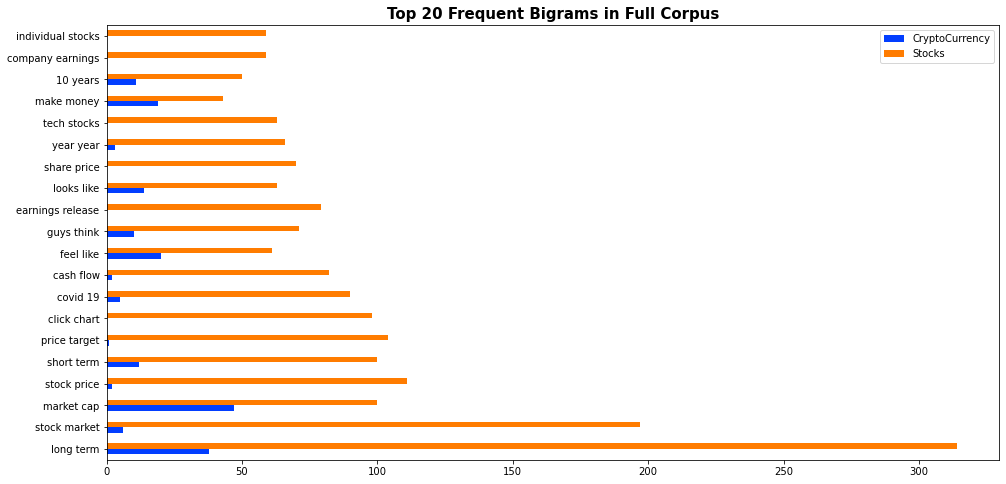

In [397]:
top20bigrams = bigrams.sort_values(ascending=False).head(20).index
top20_crypto = []
top20_stocks = []
for bigram in top20bigrams:
    try:
        top20_crypto.append(cryptobigrams[bigram])
    except:
        top20_crypto.append(0)
    try:
        top20_stocks.append(stocksbigrams[bigram])
    except:
        top20_stocks.append(0)
    
df_top20bigrams = pd.DataFrame({'CryptoCurrency': top20_crypto, 'Stocks': top20_stocks}, index = top20bigrams)

#plot top 20 bigrams
df_top20bigrams.plot(kind = 'barh', figsize=(16,8))
plt.title('Top 20 Frequent Bigrams in Full Corpus', fontsize=15, fontweight = 'bold');

- Most of the top 20 most frequent bigrams (excluding stop words) across both subreddits are from r/stocks, which as explained above, makes sense because there are more words from the r/stocks subreddit
- It is interesting how "long term" appears more frequently than "short term" in both r/stocks and r/CryptoCurrency
- There are certain bigrams that rarely appear in r/CryptoCurrency such as "individual stocks", "company earnings", "tech stocks", "share price", "earnings release" and "click chart"

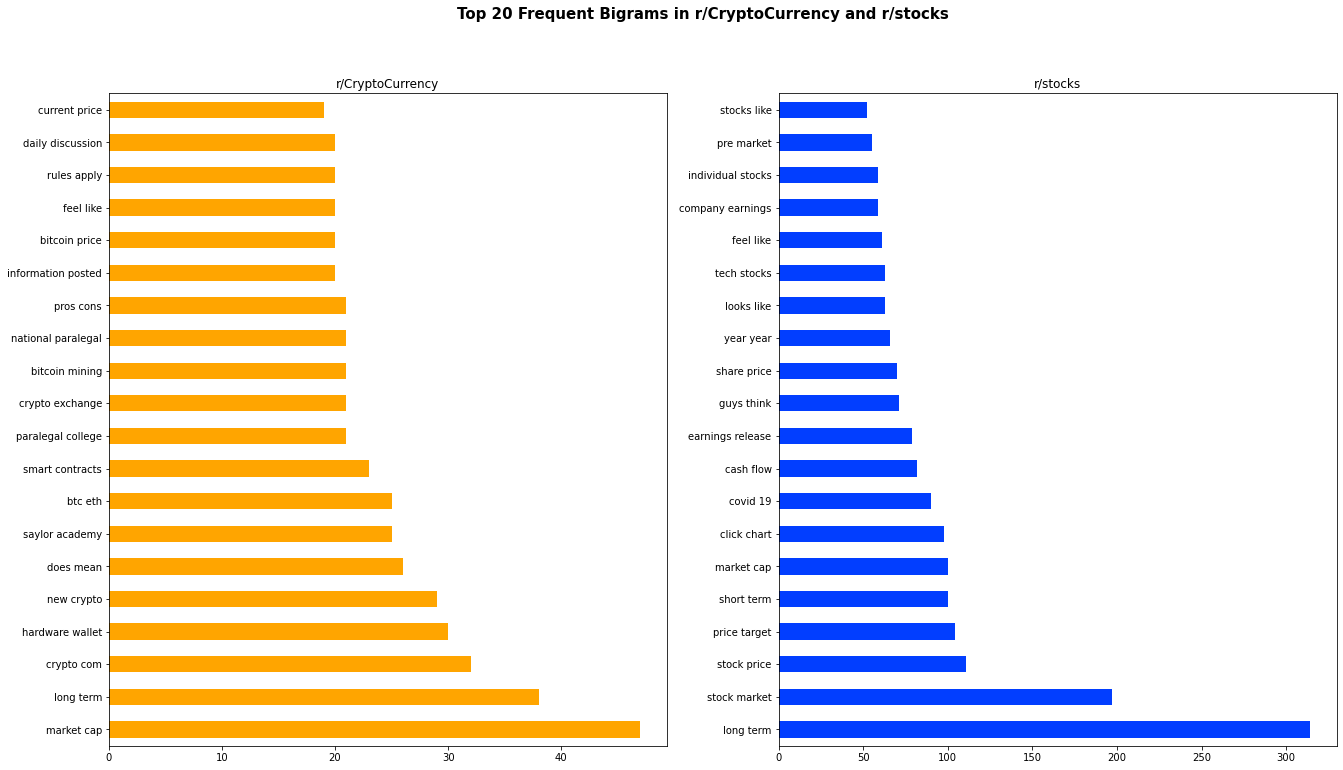

In [398]:
fig = plt.figure(figsize=(22,12))

ax1 = plt.subplot(1,2,1)
top20cryptobigrams.plot(kind='barh', color = 'orange')
ax1.set_title('r/CryptoCurrency')

ax2 = plt.subplot(1,2,2)
top20stocksbigrams.plot(kind='barh')
ax2.set_title('r/stocks')

plt.suptitle('Top 20 Frequent Bigrams in r/CryptoCurrency and r/stocks', fontsize=15, fontweight = 'bold');

In [399]:
# bigrams unique in crypto
set(top20cryptobigrams.index) - set(top20stocksbigrams.index)

{'bitcoin mining',
 'bitcoin price',
 'btc eth',
 'crypto com',
 'crypto exchange',
 'current price',
 'daily discussion',
 'does mean',
 'hardware wallet',
 'information posted',
 'national paralegal',
 'new crypto',
 'paralegal college',
 'pros cons',
 'rules apply',
 'saylor academy',
 'smart contracts'}

In [400]:
# bigrams unique in stocks
set(top20stocksbigrams.index) - set(top20cryptobigrams.index)

{'cash flow',
 'click chart',
 'company earnings',
 'covid 19',
 'earnings release',
 'guys think',
 'individual stocks',
 'looks like',
 'pre market',
 'price target',
 'share price',
 'short term',
 'stock market',
 'stock price',
 'stocks like',
 'tech stocks',
 'year year'}

In [401]:
# bigrams in both r/stocks and r/Crypto
set(top20cryptobigrams.index).intersection(set(top20stocksbigrams.index))

{'feel like', 'long term', 'market cap'}

- Bigrams may be more useful when building my classification model as there is less overlap. The only three bigrams that are in the top 20 most frequent bigrams for both r/CryptoCurrency and r/stocks are "long term", "market cap", and "feel like"
- Many of the bigrams I would expect to be unique to one subreddit over the other (such as "stock market" or "bitcoin mining"), but it is interesting that "covid 19" appears far more frequently in r/stocks, and "current price" appears more frequently in r/CryptoCurrency (which I would think people interested in both stocks and cryptocurrency be interested in knowing)

### 2.3 Other Features

#### Question marks

In [402]:
df['questions'] = df['text_adj'].str.count('\\?')

In [403]:
df.groupby('subreddit').sum()['questions']

subreddit
CryptoCurrency    1309
stocks            4109
Name: questions, dtype: int64

- More posts in r/stocks use question marks, which could indicate more people ask questions in r/stocks than in r/CryptoCurrency

#### URL

In [404]:
df['links'] = df['text'].str.count('http')
df.groupby('subreddit').sum()['links']

subreddit
CryptoCurrency     780
stocks            1558
Name: links, dtype: int64

- More posts in r/stocks contain "http", which could indicate more people in r/stocks share links than in r/CryptoCurrency

## 3. Context for Frequent Words

- I want to have some context for how posts in r/stocks and r/CryptoCurreny use the most frequent words
- I will create a function that will take a given word and print a string containing the previous word and next 4 words in the post
- The function will print 10 random rows from the subreddit

In [405]:
def snippet_generator(word, subreddit , n_rows=10):
    row = 0
    if subreddit in ['stocks','CryptoCurrency']:
        df_search = df[df['subreddit']==subreddit].sample(frac=1).reset_index(drop=True)
        for i in range(len(df_search)):
            if row < n_rows:
                try:
                    df_search.loc[i].token.index(word)
                    word_list = df_search.loc[i].text_adj.split(' ')
                    word_loc = df_search.loc[i].text_adj.split(' ').index(word)

                    try:
                        print(f'{word_list[word_loc-1]} {word_list[word_loc]} {word_list[word_loc+1]} {word_list[word_loc+2]} {word_list[word_loc+3]} {word_list[word_loc+4]}')
                        row += 1
                    except:
                        pass
                except:
                    pass
        if row == 0:
            print ('Word not in corpus! Choose another word')
    else:
        print('Choose stocks or CryptoCurrency subreddits!')

- Let's look at the context for words such as "price" and "market", which are common in both subreddits

In [410]:
# "price" in r/CryptoCurrency
snippet_generator('price','CryptoCurrency')

gas price is always as much
house' price oracles. tezos is launching
the price with those out of
chainlink price feeds for powering its
as price now passes $500! but
what price would you sell btc
say price difference here...wtf. rh/coinbase. hhmm
bitcoin price tanks 10%, wipes out
businessweek: price of gold rises because
the price as effectively as earlier.


In [408]:
# "price" in r/stocks
snippet_generator('price','stocks')

current price - $12.00 target sell
again? price predictions for msft?with the
oil price gains stalled, while communication
in price was not from melvin
the price of the coin fell
identical price - but a larger
even price is at 20.25 and
share price of a company by
new price targets and reading about
the price now is at $215.


- posts in r/CryptoCurrency talk about bitcoin price, chainlink price, or ethereum price, while posts in r/Stocks talk about stock price or strike price
- there are many instances where it is difficult to know what product the price is related to, in which case price is probably not a good key word in identifying posts from r/CryptoCurrency

In [411]:
# "market" in r/CryptoCurrency
snippet_generator('market','CryptoCurrency')

500k market cap! less than 500
crypto market in indonesia is huge
whilst market manipulation is a factor
$83million market cap. faster and cheaper
the market caps will be low
yesterday's market action, but it is
60k market cap should almost defiantly
the market would decide the fair
the market is surging. you know,
by market cap, that have interesting


In [412]:
# "market" in r/stocks
snippet_generator('market','stocks')

on market stimulus, coronavirus response, etc.i
the market cap were from like
whole market is hoping/counting on a
the market early 2021 when the
to market by supporting startup costs
stock market being open 24/7?so, I
breaking market fundamentals/trading strategies? is this
current market price is $30 per
the market can see significant short-term
the market with 1000$. how would


- posts in r/CryptoCurrency talk about crypto market and bitcoin market, although there are mentions of stock market, or simply "market" which could be applicable to both subreddits
- posts in r/stocks mention "stock market" although many posts also seem to use the generic term "market" which could apply to both subreddits

In [413]:
# elon musk in r/CryptoCurrency
snippet_generator('elon','CryptoCurrency')

underestimating elon and dogecointoo much focus
threatening elon musk is incredibly lame.
will elon musk make or break
all elon musk ‘does not feel
moon elon musk vs dogecoin |
by elon musk twitter, by china
upon elon musk or mark cuban.
that elon sold his bitcoin for
day. elon stop!in the last few
#1609 elon musk on the joe


In [414]:
# elon musk in r/stocks
snippet_generator('elon','stocks')

making elon musk the first trillionaire:
by elon musk at tesla's "battery
call, elon painstakingly laid out how
knowing elon musk, but thing is
is elon musk really worth $59
the elon musk-led company is a
that elon musk did that with
time elon does anything: elon is
amazing. elon musk is a visionary.
of elon xd. sooo tesla stocks


- both r/stocks and r/CryptoCurrency do seem interested in posting about Elon Musk
- From the random 10 snippets, r/CryptoCurrency seem to be posting more about Elon's tweets or posting personal opinions on Elon Musk, while r/stocks seem to be posting about tesla stocks, or discussing Elon's net worth

In [415]:
# covid 19 in r/cryptocurrency
snippet_generator('covid','CryptoCurrency')

to covid getting bad in indonesiajust
for covid related grants with the
the covid dumpbitcoin has been moving
the covid crash in march 2020.


In [416]:
# covid 19 in r/cryptocurrency
snippet_generator('covid','stocks')

endless covid debate, and the rants
the covid crisis and there are
its covid vaccine mrna-1273 will be
that covid 19 is a big
the covid crash, i did not
before covid hit, and that restructuring
severe covid pneumonia and lung injury
continued covid uncertainties; analysts cited underperformance
low covid infections (compared to winter
by covid 19 and have reaped


- r/CryptoCurrency does not have many posts about covid19. 
- It is interesting that this is a hot topic within the r/stocks subreddit, where it seems a lot of the posts are related to news about covid and its impact on the stock market

## 4. Sentiment Analysis

### 4.1 Sentiment Analysis with Vader

In [418]:
sent = SentimentIntensityAnalyzer()

In [419]:
df['polarity_scores_neg'] = df['text_adj'].apply(lambda x: sent.polarity_scores(x)['neg'])
df['polarity_scores_pos'] = df['text_adj'].apply(lambda x: sent.polarity_scores(x)['pos'])
df['polarity_scores_neu'] = df['text_adj'].apply(lambda x: sent.polarity_scores(x)['neu'])
df['polarity_scores_comp'] = df['text_adj'].apply(lambda x: sent.polarity_scores(x)['compound'])

In [420]:
polarity_col = ['subreddit','polarity_scores_neg', 'polarity_scores_pos', 'polarity_scores_neu', 'polarity_scores_comp']
df[polarity_col].groupby('subreddit').mean()

,polarity_scores_neg,polarity_scores_pos,polarity_scores_neu,polarity_scores_comp
subreddit,,,,
CryptoCurrency,0.048360,0.095116,0.856128,0.171118
stocks,0.041675,0.113554,0.844772,0.452540


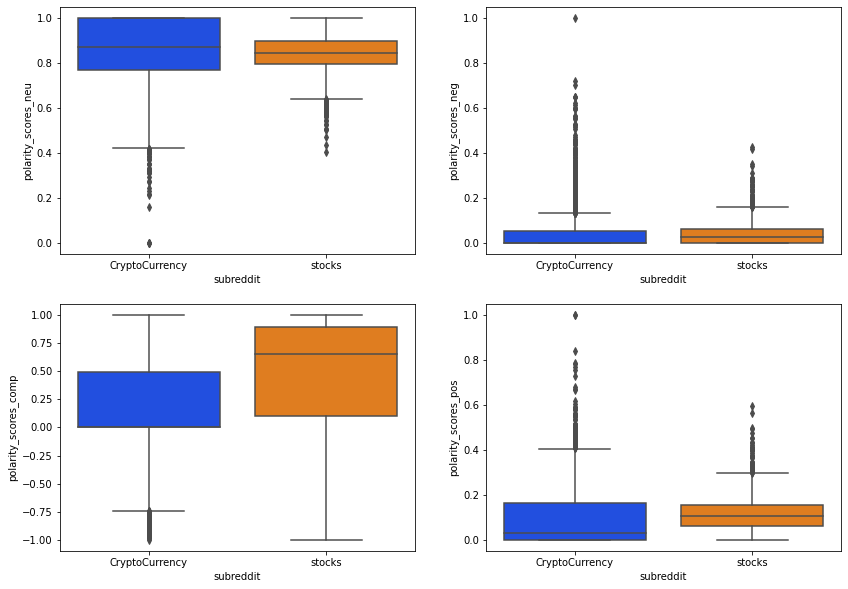

In [423]:
fig, axes = plt.subplots(2,2, figsize=(14,10))
polar_col = ['polarity_scores_neg', 'polarity_scores_pos', 'polarity_scores_neu', 'polarity_scores_comp']

for i,t in enumerate(polar_col):
    sns.boxplot(y=t, x="subreddit", data=df, ax=axes[i%2, int(i<2)])

- The mean scores for neutral, negative, and positive are similar however the compounded polarity score for r/stocks is significantly higher
- By looking at the boxplots this does make sense, because while the median scores are similar, the interquartile range for neutral and positive scores is much greater for r/CryptoCurrency than r/stocks
- Additionally, there are a lot more outliers present in the positive polarity and negative polarity boxplots for r/CryptoCurrency, indicating the polarity scores are more extreme for r/CryptoCurrency
- I will look at the 10 posts with the highest negative polarity and positive polarity scores

In [424]:
# top 10 negative posts
df.sort_values(by='polarity_scores_neg', ascending = False)[['subreddit', 'text_adj', 'polarity_scores_neg']].head(10)

,subreddit,text_adj,polarity_scores_neg
2373,CryptoCurrency,guilty,1.000
2078,CryptoCurrency,biden = dump,0.722
1134,CryptoCurrency,very nervous,0.705
2390,CryptoCurrency,and now I am broke as hell,0.649
331,CryptoCurrency,paypal phishing scam,0.649
865,CryptoCurrency,is this a scam?,0.649
243,CryptoCurrency,oh the irony! bad bot.,0.625
1689,CryptoCurrency,"akon cryptocoin city, wtf!?!?",0.613
601,CryptoCurrency,bitconnect scam man lost life savings,0.600
743,CryptoCurrency,ethereum cheat sheet,0.600


- All 10 highest negative polarity scores are from r/CryptoCurrency
- There seems to be a fear of being scammed or losing money in these posts, which does make sense because cryptocurrency is a riskier product

In [425]:
df.sort_values(by='polarity_scores_pos', ascending = False)[['subreddit', 'text_adj', 'polarity_scores_pos']].head(10)

,subreddit,text_adj,polarity_scores_pos
1320,CryptoCurrency,ha!,1.000
731,CryptoCurrency,happiness,1.000
2245,CryptoCurrency,great opportunity 30% launch bonus,0.839
1404,CryptoCurrency,my precious,0.787
251,CryptoCurrency,free money!,0.782
1188,CryptoCurrency,free rur,0.767
161,CryptoCurrency,so true,0.756
1319,CryptoCurrency,support - btc,0.730
976,CryptoCurrency,crypto god,0.677
571,CryptoCurrency,please adopt the lighting 💡 network—it is amazing!,0.669


- All 10 highest positive polarity scores are also from r/CryptoCurrency
- There are many posts about free money, or happiness that have high polarity scores. This also makes sense with cryptocurrency, which is a riskier product but can also have high reward

### 4.2 Reddit's Upvote Ratio

- Another method to see how people react to posts in these subreddits is to look at the upvote ratio. 
- The upvote ratio is a float between 0 to 1 (where 1 would mean the post has mostly upvotes compared to downvotes, and 0 would mean the post has most downvotes)
- The upvote ratio will show what posts other users in these subreddits agree or disagree with, which will allow me to understand what type of sentiments are popular in each subreddit

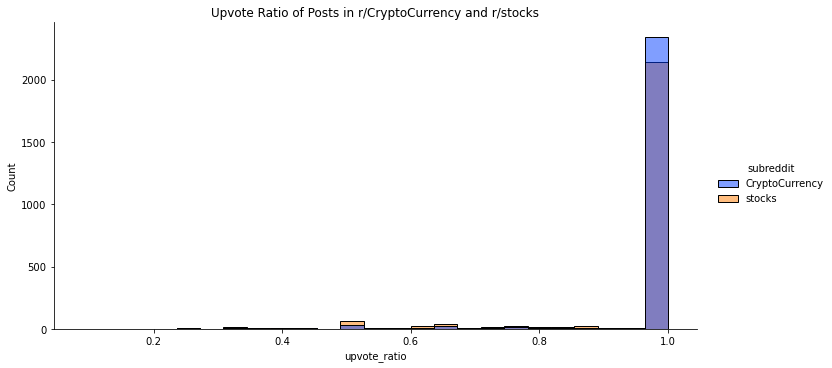

In [439]:
sns.displot(data = df, x = 'upvote_ratio', hue = 'subreddit', bins = 25, height = 5, aspect = 2)
plt.title('Upvote Ratio of Posts in r/CryptoCurrency and r/stocks');

In [442]:
df.groupby('subreddit').describe()['upvote_ratio']

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
CryptoCurrency,2500.0,0.976004,0.102663,0.14,1.0,1.0,1.0,1.0
stocks,2424.0,0.955854,0.136278,0.09,1.0,1.0,1.0,1.0


- Most posts in r/stocks and r/CryptoCurrency have an upvote ratio of 1. 
- It makes sense that the upvote ratio is skewed towards 1 because I have already cleaned the dataset of posts that were removed by moderators/deleted by users themselves (which would be more likely to have a lower upvote ratio)
- However, this feature may not be very useful anymore in understanding how certain posts have been received on reddit
- I will only look at the posts with the lowest upvote ratio since most posts have an upvote ratio of 1

In [455]:
# lowest upvote ratio
with pd.option_context('display.max_colwidth', 400):
  display(df.sort_values(by='upvote_ratio')[['text_adj', 'upvote_ratio', 'subreddit']].head(5))

,text_adj,upvote_ratio,subreddit
3441,"best way to make money trading stock optionshey everyone, i have been trading stock options for a few years now and it has become my primary source of income. the pandemic has definitely made trading options a bit more exciting to say the least, lol. anyways, i focus on riding the hype stocks and selling for quick profits. this is a bit different than normal day trading because of the speed th...",0.09,stocks
4744,"what is next? tslai deff think it might go up a bit but after q2 results, it will eventually go down and come back up within months. but as of now best to do is sell/wait/buy when comes down",0.10,stocks
747,"does anybody still doubt me? hex ; stablecoins all the wayhey you all, I have been trying to tell you for months that the crypto space (and reddit) have been under heavy manipulation ; that things were going to get very unstable. you know what coin you can always count on?? hex. [use this link to get started]( ) listen to me carefully. if you buy hex do not attempt to do anything sneaky with...",0.14,CryptoCurrency
1278,i got fired on my bday over a typo....eth donations accepted 🥺🥺🙃,0.14,CryptoCurrency
744,those billionaires man ....,0.15,CryptoCurrency


- The posts with the lowest upvote ratios come from both r/stocks and r/CryptoCurrency
- It seems these posts are either giving poor advice, or asking for donations which other reddit users must have downvoted

# Proceed to Notebook 3. Data Modeling